In [1]:
#1. Import the necessary libraries.

import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))

customer_df = pd.read_csv("/Users/suso/BootcampDA/Unit4/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [6]:
#3. First, look at its main features (head, shape, info).
customer_df.head()
customer_df.shape
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
#4. Rename the columns so they follow the PEP8 (snake case).

new_column_names = {
    'Customer': 'customer',
    'State': 'state',
    'Customer Lifetime Value': 'customer_lifetime_value',
    'Response': 'response',
    'Coverage': 'coverage',
    'Education': 'education',
    'Effective To Date': 'effective_to_date',
    'EmploymentStatus': 'employment_status',
    'Gender': 'gender',
    'Income': 'income',
    'Location Code': 'location_code',
    'Marital Status': 'marital_status',
    'Monthly Premium Auto': 'monthly_premium_auto',
    'Months Since Last Claim': 'months_since_last_claim',
    'Months Since Policy Inception': 'months_since_policy_inception',
    'Number of Open Complaints': 'number_of_open_complaints',
    'Number of Policies': 'number_of_policies',
    'Policy Type': 'policy_type',
    'Policy': 'policy',
    'Renew Offer Type': 'renew_offer_type',
    'Sales Channel': 'sales_channel',
    'Total Claim Amount': 'total_claim_amount',
    'Vehicle Class': 'vehicle_class',
    'Vehicle Size': 'vehicle_size',
}

customer_df = customer_df.rename(columns=new_column_names)

In [9]:
#5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

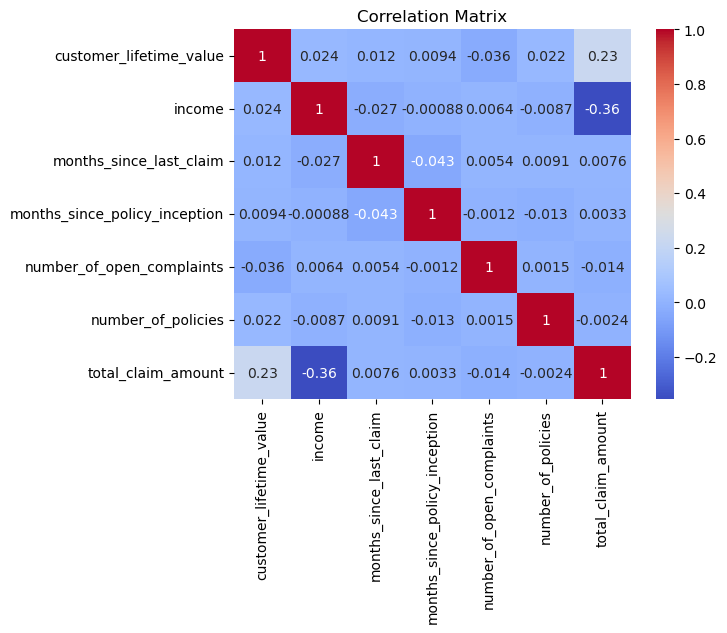

In [11]:
#6. Plot a correlation matrix, and comment on what you observe.

selected_columns = ['customer_lifetime_value', 'income', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

selected_df = customer_df[selected_columns]

corr_matrix = selected_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

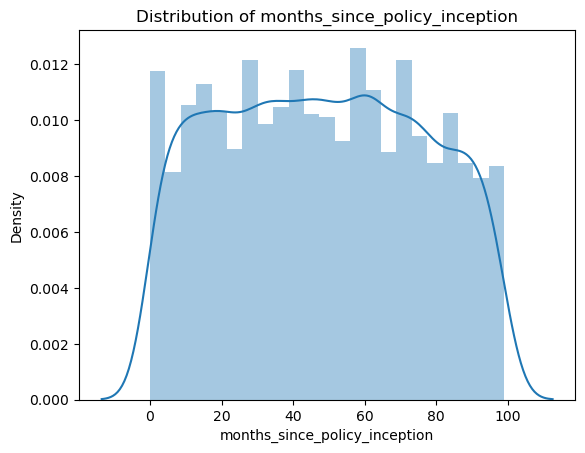

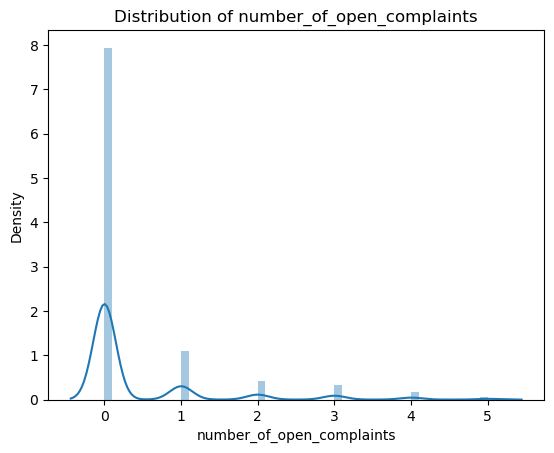

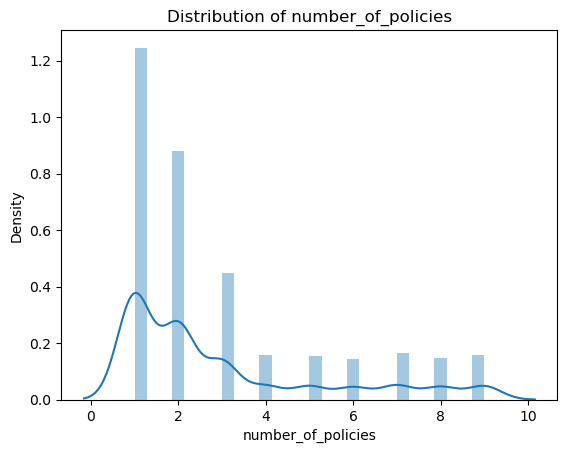

In [12]:
#7. Plot every continuous variable. Comment what you can see in the plots.

for column in selected_columns:
    sns.distplot(customer_df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

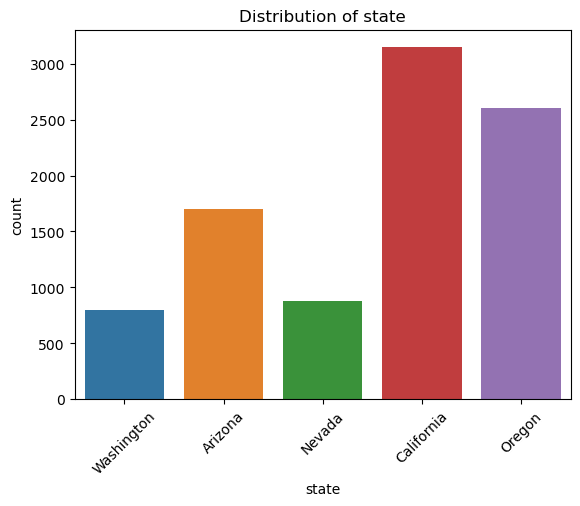

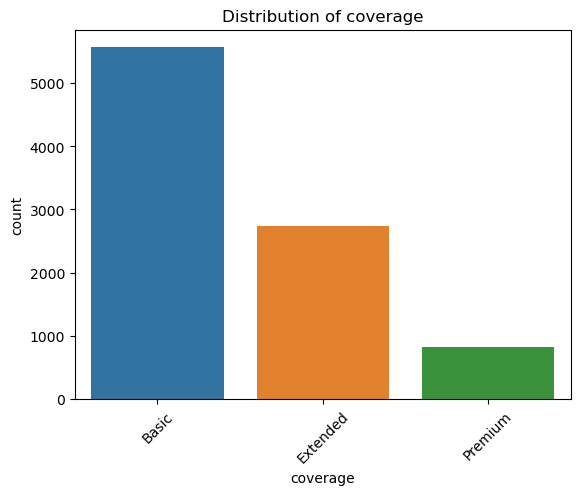

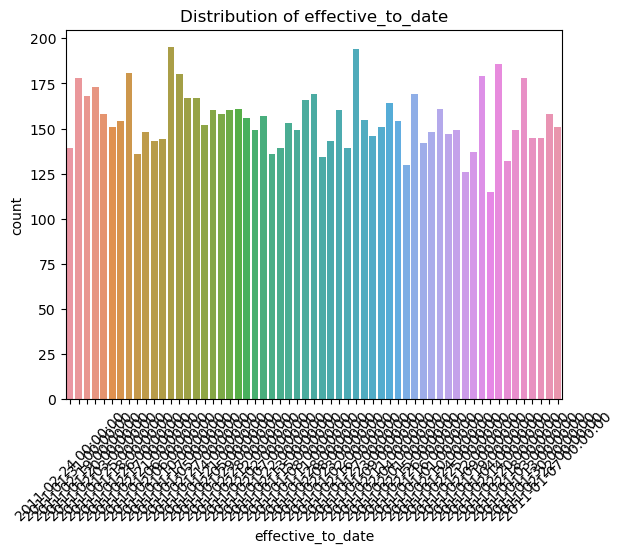

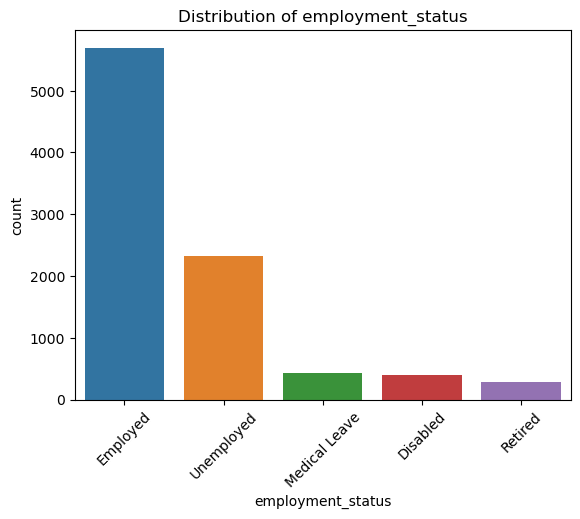

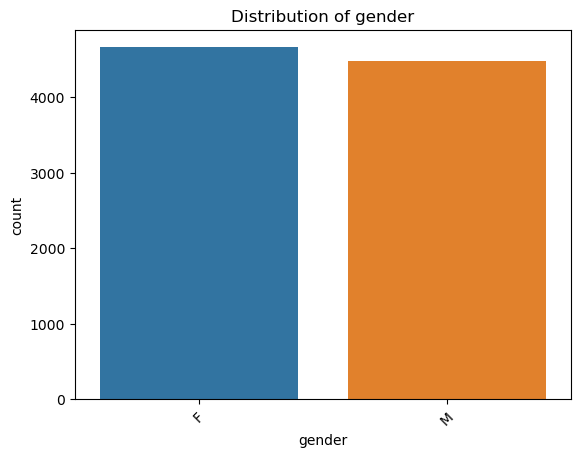

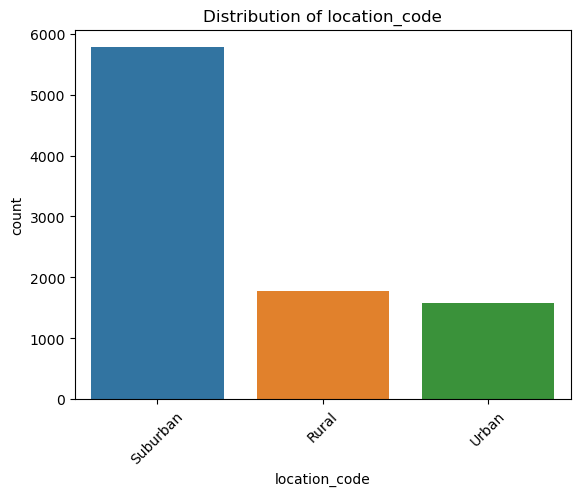

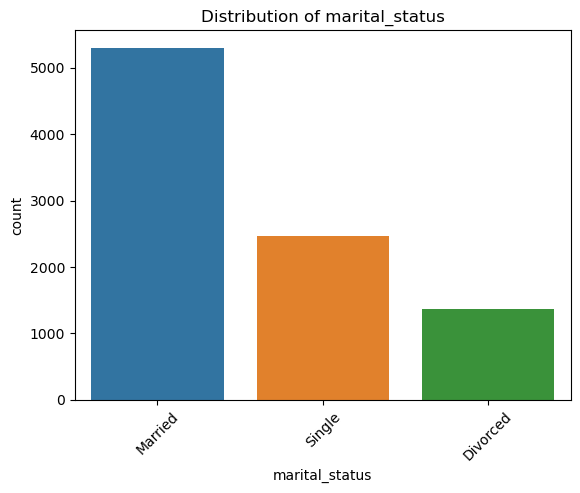

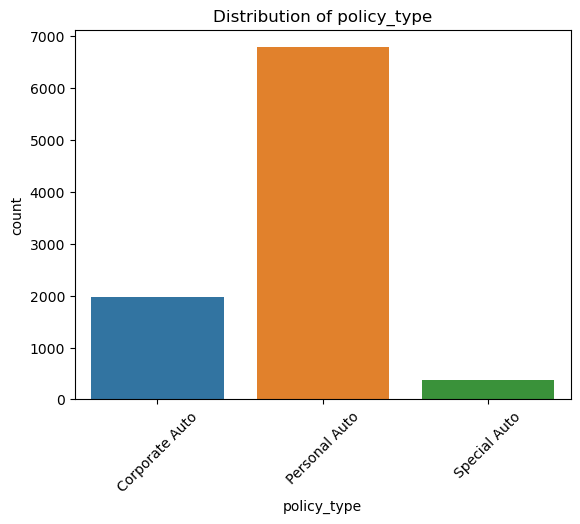

In [13]:
#8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

customer_df = customer_df.drop('customer', axis=1)

categorical_columns = ['state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender',
                       'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                       'sales_channel', 'vehicle_class', 'vehicle_size']

for column in categorical_columns:
    sns.countplot(x=column, data=customer_df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

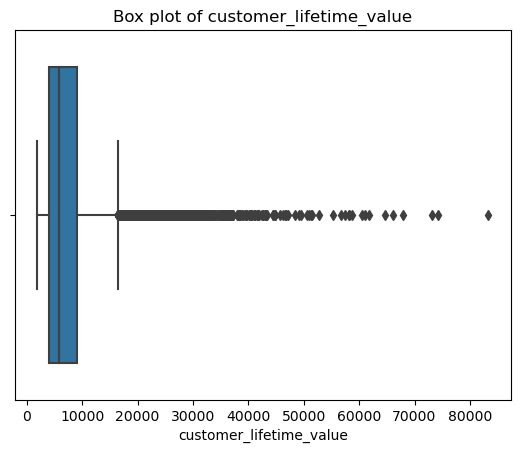

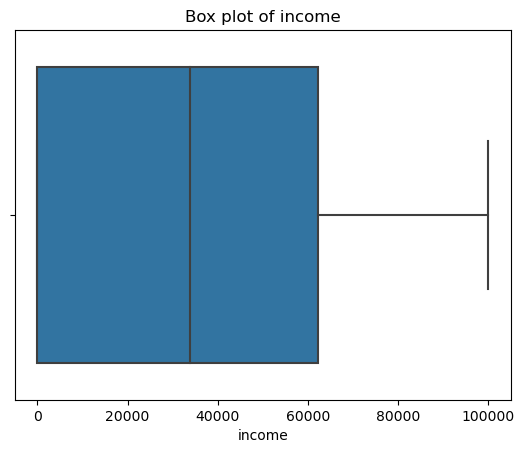

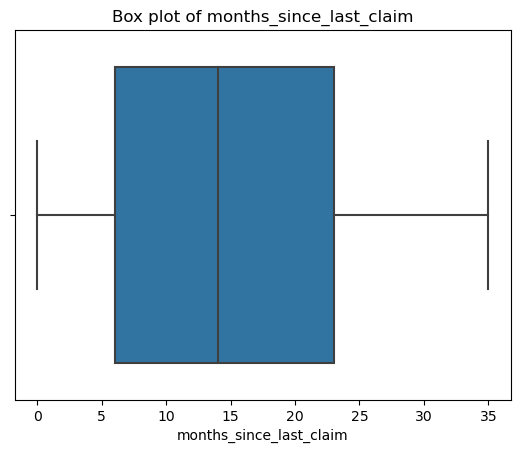

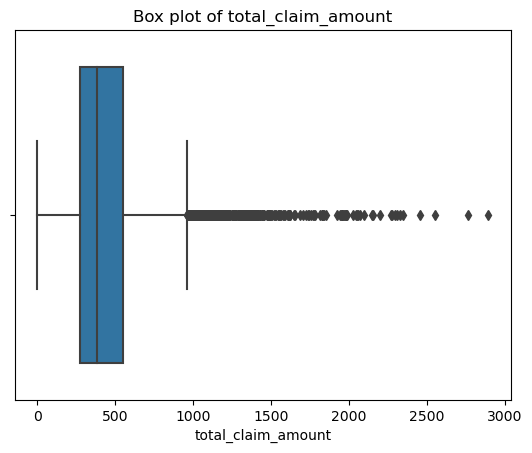

In [14]:
#9. Look for outliers in the continuous variables. (Hint: Thereâ€™s a good plot to do that!). In case you find outliers, comment on what you will do with them.

for column in selected_columns:
    sns.boxplot(x=column, data=customer_df)
    plt.title(f"Box plot of {column}")
    plt.show()

In [15]:
#10. # Check for NaN values in all columns

nan_values = customer_df.isnull().sum()

print(nan_values)

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64
